In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras

In [34]:
samples = 100
data_x_values = np.random.uniform(0,2*math.pi, samples).astype(np.float32)
data_y_values = np.sin(data_x_values).astype(np.float32)

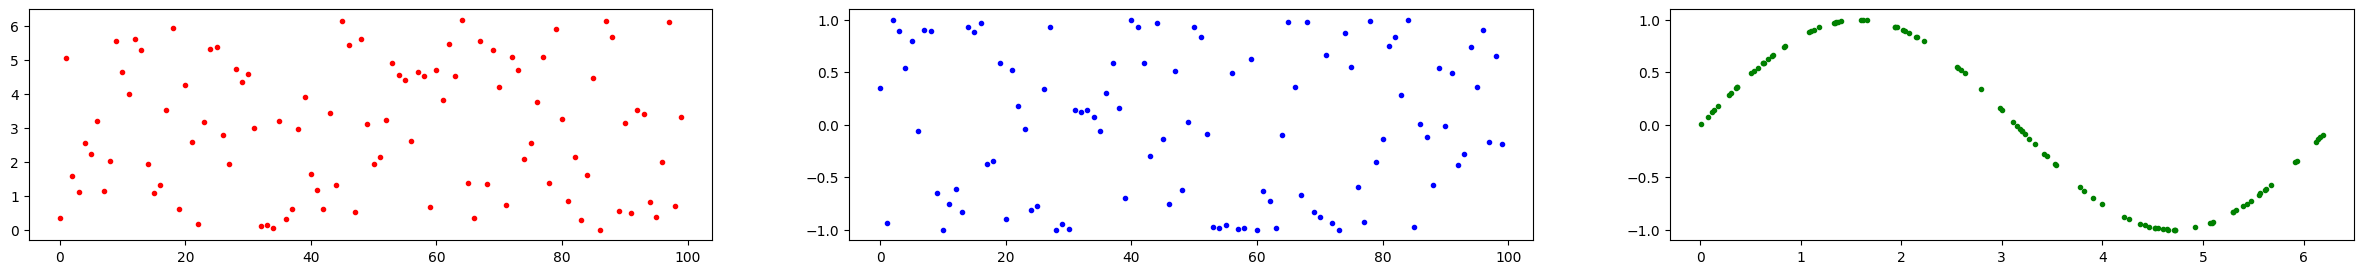

In [35]:
plotter = plt.figure(figsize=(30,3))

plot_x = plotter.add_subplot(131)
plot_y = plotter.add_subplot(132)
plot_xy = plotter.add_subplot(133)
plot_x.plot(data_x_values,'r.')
plot_y.plot(data_y_values,'b.')
plot_xy.plot(data_x_values,data_y_values,'g.')

## Data splitting and noise addition

## Noise Addition

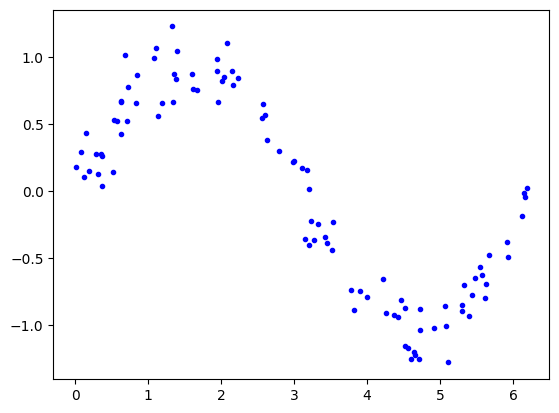

In [36]:
data_y_values = data_y_values + 0.15*np.random.randn(*data_y_values.shape)
plt.plot(data_x_values, data_y_values, 'b.')

## Splitting data

In [37]:
training_data_split = int(0.6*samples)
test_val_data_split = int(0.2 * samples + training_data_split)

x_train, x_test, x_validate = np.split(data_x_values , [training_data_split,test_val_data_split])
y_train, y_test, y_validate = np.split(data_y_values , [training_data_split,test_val_data_split])


In [38]:
print(x_train.shape, x_test.shape, x_validate.shape)

(60,) (20,) (20,)


Text(0.5, 1.0, 'Validate bestribution')

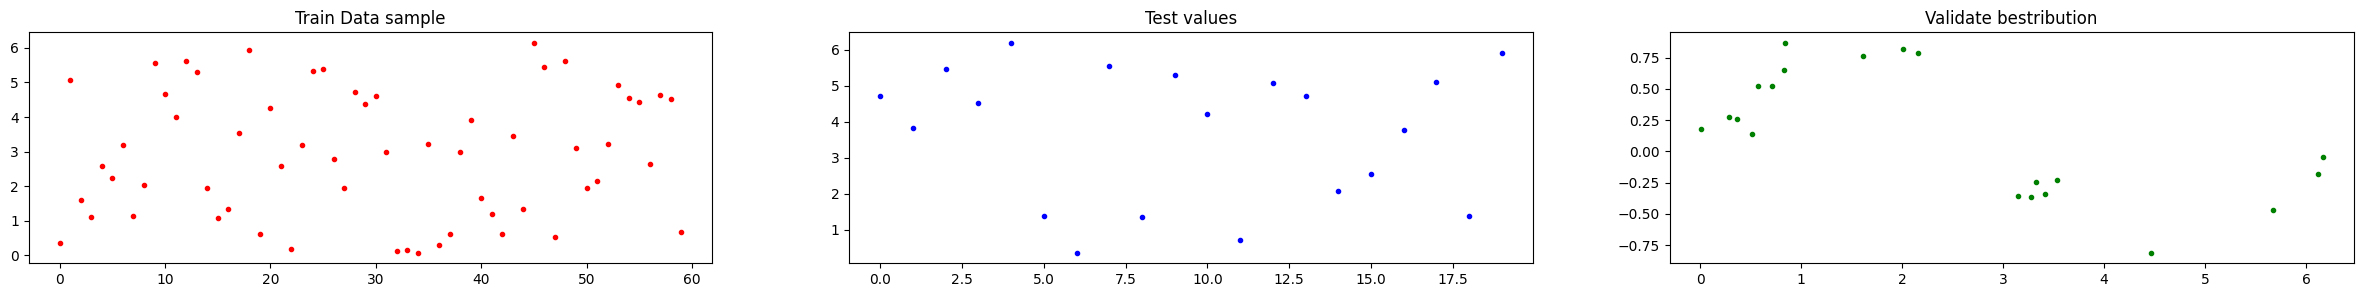

In [39]:
plotter_splitter = plt.figure(figsize=(30,3))

plot_x = plotter_splitter.add_subplot(131)
plot_y = plotter_splitter.add_subplot(132)
plot_xy = plotter_splitter.add_subplot(133)
plot_x.plot(x_train,'r.')
plot_y.plot(x_test,'b.')
plot_xy.plot(x_validate,y_validate,'g.')
plot_x.set_title("Train Data sample")
plot_y.set_title("Test values")
plot_xy.set_title("Validate bestribution")


## Basic model creation and training

In [40]:
sine_model = tf.keras.Sequential()
sine_model.add(keras.layers.Dense(8,'relu',input_shape=(1,)))
sine_model.add(keras.layers.Dense(1))

sine_model.compile(optimizer='adam' , loss='mse',metrics=['mae'])
sine_model.summary()

Moddel: "Sequantial_2"

C:\Users\hamdi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sine_model_1_history = sine_model.fit(x_train, y_train, 32, 500, validation_data=(x_validate, y_validate))